In [1]:
import matplotlib.pyplot as plt
import csv, glob, os

In [2]:
problem_names = ['benchmark', 'primal_benchmark']
base_directories = ['../dual_report', '../primal_report']

In [3]:
schemes = ['1_LSCHEME', '2_LSCHEME', 'NEWTON', 'PICARD']
directories_collection = [[os.path.join(base_directory, problem_name + '_' + scheme) for scheme in schemes] for base_directory, problem_name in zip(base_directories, problem_names)]

In [4]:
scheme_dictionaries = [{}, {}]
scheme_iterationss = [{}, {}]
scheme_times = [{}, {}]

In [5]:
for directories, base_directory, scheme_dictionary, problem_name in zip(directories_collection, base_directories, scheme_dictionaries, problem_names):
    for directory in directories:
        files = glob.glob(os.path.join(directory, '*_' + problem_name +'*.csv'))
        
        scheme = directory.replace(os.path.join(base_directory, problem_name + '_'), '')
        scheme_dictionary[scheme] = []

        print('Pattern ' + os.path.join(directory, '*_' + problem_name +'*.csv') + ' matched with ' + str(len(files)) + ' files of scheme ' + scheme)

        for file in files:
            scheme_dictionary[scheme].append( file )
        
        scheme_dictionary[scheme].sort()

Pattern ../dual_report\benchmark_1_LSCHEME\*_benchmark*.csv matched with 8 files of scheme 1_LSCHEME
Pattern ../dual_report\benchmark_2_LSCHEME\*_benchmark*.csv matched with 8 files of scheme 2_LSCHEME
Pattern ../dual_report\benchmark_NEWTON\*_benchmark*.csv matched with 8 files of scheme NEWTON
Pattern ../dual_report\benchmark_PICARD\*_benchmark*.csv matched with 8 files of scheme PICARD
Pattern ../primal_report\primal_benchmark_1_LSCHEME\*_primal_benchmark*.csv matched with 8 files of scheme 1_LSCHEME
Pattern ../primal_report\primal_benchmark_2_LSCHEME\*_primal_benchmark*.csv matched with 8 files of scheme 2_LSCHEME
Pattern ../primal_report\primal_benchmark_NEWTON\*_primal_benchmark*.csv matched with 8 files of scheme NEWTON
Pattern ../primal_report\primal_benchmark_PICARD\*_primal_benchmark*.csv matched with 8 files of scheme PICARD


In [6]:
for directories, base_directory, scheme_dictionary, scheme_iterations in zip(directories_collection, base_directories, scheme_dictionaries, scheme_iterationss):
    for scheme in scheme_dictionary:
        scheme_iterations[scheme] = []

        for file in scheme_dictionary[scheme]:
            with open(file, 'r') as csvfile:
                lines = csv.reader(csvfile, delimiter=',')
                scheme_iterations[scheme].append(sum(1 for row in lines))

                print('File ' + file + ' has ' + str(scheme_iterations[scheme][-1]) + ' iterations!')

File ../dual_report\benchmark_1_LSCHEME\10_benchmark_LSCHEME_richards_solver.csv has 62 iterations!
File ../dual_report\benchmark_1_LSCHEME\20_benchmark_LSCHEME_richards_solver.csv has 64 iterations!
File ../dual_report\benchmark_1_LSCHEME\30_benchmark_LSCHEME_richards_solver.csv has 64 iterations!
File ../dual_report\benchmark_1_LSCHEME\40_benchmark_LSCHEME_richards_solver.csv has 64 iterations!
File ../dual_report\benchmark_1_LSCHEME\50_benchmark_LSCHEME_richards_solver.csv has 64 iterations!
File ../dual_report\benchmark_1_LSCHEME\60_benchmark_LSCHEME_richards_solver.csv has 64 iterations!
File ../dual_report\benchmark_1_LSCHEME\70_benchmark_LSCHEME_richards_solver.csv has 64 iterations!
File ../dual_report\benchmark_1_LSCHEME\80_benchmark_LSCHEME_richards_solver.csv has 64 iterations!
File ../dual_report\benchmark_2_LSCHEME\10_benchmark_LSCHEME_richards_solver.csv has 72 iterations!
File ../dual_report\benchmark_2_LSCHEME\20_benchmark_LSCHEME_richards_solver.csv has 73 iterations!


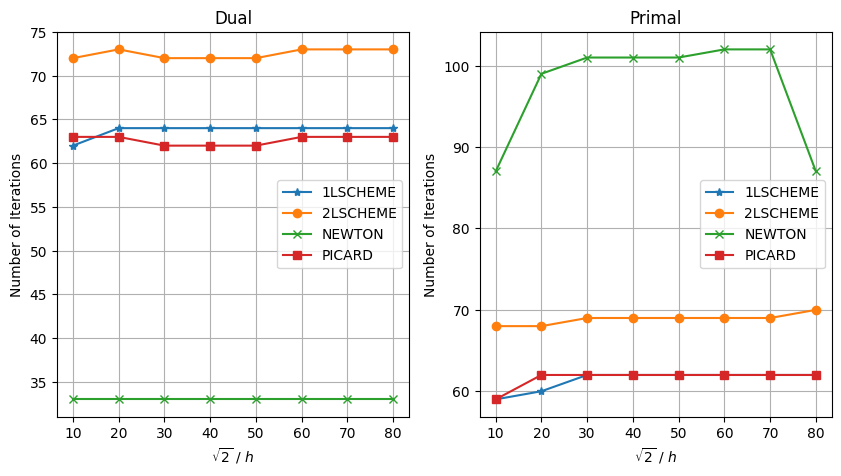

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
names = []
symbols = ['-*', '-o', '-x', '-s']

for ax, scheme_iterations, title in zip(axs, scheme_iterationss, ['Dual', 'Primal']):
    for scheme, symbol in zip(scheme_iterations, symbols):

        values = scheme_iterations[scheme]

        ax.plot(range(10, 10*len(values)+1, 10), values, symbol)
        ax.set_ylabel('Number of Iterations')
        ax.set_xlabel('$\sqrt{2}$ / $h$')

        names.append(scheme.replace('_', ''))

        ax.set_title(title)

    ax.legend(names)
    ax.grid()